In [203]:
import numpy as np
import matplotlib.pyplot as plt

import timeit
import warnings

# Task 1

In [204]:
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [205]:
def cosinus_signal_func(freq = None, T = None, init_phase = 0):
    if freq:
        w = 2 * np.pi * freq
    elif T:
        w = 2 * np.pi / T
    else:
        return None
    cos_func = lambda t: np.cos(t * w + init_phase)

    return cos_func

def calc_signal(s_func, t_start = 0, t_end = None, t_step = None):
    if t_end is None:
        t_end = 2
    if t_step is None:
        t_step = 0.01

    time_series = np.arange(t_start, t_end, t_step)
    signal_vals = np.array([s_func(t) for t in time_series])

    return signal_vals, time_series

In [206]:
cos_50hz_f  = cosinus_signal_func(freq= 50)
cos_150hz_f = cosinus_signal_func(freq= 150)

cos_50hz_signal, t_series_50hz = calc_signal(cos_50hz_f, t_end=0.2, t_step=0.001)
cos_150hz_signal, t_series_150hz = calc_signal(cos_150hz_f, t_end=2, t_step=0.01)

In [207]:
runs_count = 100

spectrum_fft_50hz_time = timeit.timeit(lambda: np.fft.fft(cos_50hz_signal), number=runs_count)
spectrum_fft_150hz_time = timeit.timeit(lambda: np.fft.fft(cos_150hz_signal), number=runs_count)

spectrum_dft_slow_50hz_time = timeit.timeit(lambda: DFT_slow(cos_50hz_signal), number=runs_count)
spectrum_dft_slow_150hz_time = timeit.timeit(lambda: DFT_slow(cos_150hz_signal), number=runs_count)

print(f"""fft ({runs_count} times):
      50hz: {spectrum_fft_50hz_time:.4f} sec; 150hz: {spectrum_fft_150hz_time:.4f} sec""")
print(f"""DFT slow ({runs_count} times):
      50hz: {spectrum_dft_slow_50hz_time:.4f} sec; 150hz: {spectrum_dft_slow_150hz_time:.4f} sec""")
print(f"fft is {spectrum_dft_slow_50hz_time/spectrum_fft_50hz_time:.1f} times faster at 50hz")
print(f"fft is {spectrum_dft_slow_150hz_time/spectrum_fft_150hz_time:.1f} times faster at 150hz")

fft (100 times):
      50hz: 0.0016 sec; 150hz: 0.0009 sec
DFT slow (100 times):
      50hz: 0.2766 sec; 150hz: 0.2526 sec
fft is 171.9 times faster at 50hz
fft is 294.9 times faster at 150hz


In [208]:
spectrum_fft_50hz = np.fft.fft(cos_50hz_signal)
spectrum_fft_150hz = np.fft.fft(cos_150hz_signal)

restored_signal_ifft_50hz = np.asarray(np.fft.ifft(spectrum_fft_50hz), float)
restored_signal_ifft_150hz = np.asarray(np.fft.ifft(spectrum_fft_150hz), float)

C:\Users\asego\AppData\Local\Temp\ipykernel_7724\2522609882.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  restored_signal_ifft_50hz = np.asarray(np.fft.ifft(spectrum_fft_50hz), float)
C:\Users\asego\AppData\Local\Temp\ipykernel_7724\2522609882.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  restored_signal_ifft_150hz = np.asarray(np.fft.ifft(spectrum_fft_150hz), float)


[]

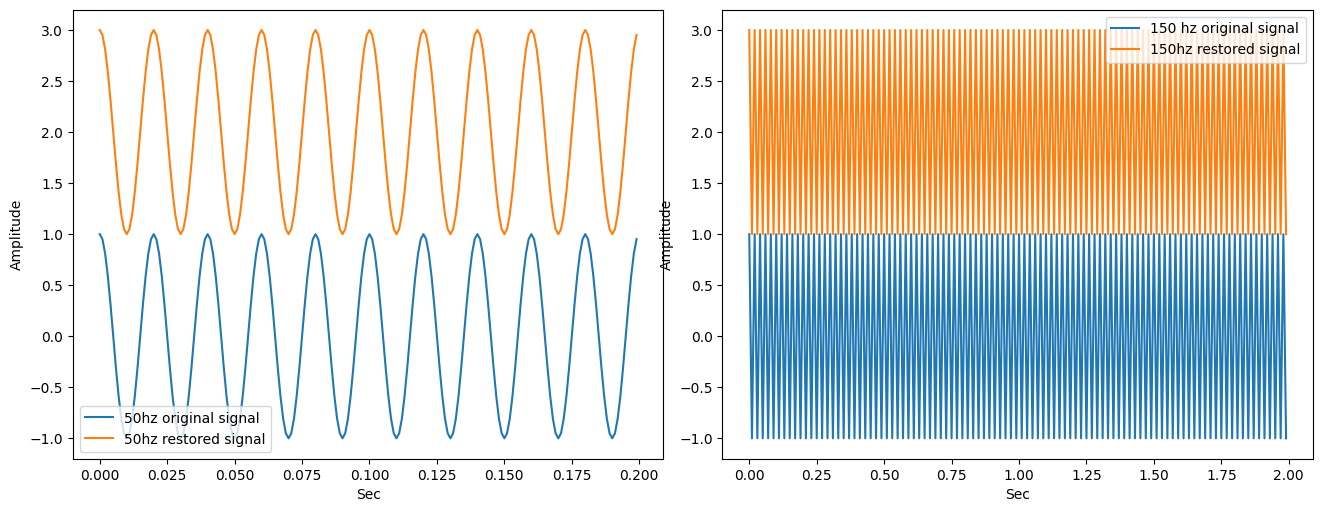

In [209]:
fig = plt.figure(figsize=(16, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.4)

plt.subplot(221)
plt.plot(t_series_50hz, cos_50hz_signal, label="50hz original signal")
plt.plot(t_series_50hz, restored_signal_ifft_50hz + 2, label="50hz restored signal")
plt.legend()
plt.xlabel("Sec")
plt.ylabel("Amplitude")

plt.subplot(222)
plt.plot(t_series_150hz, cos_150hz_signal, label="150 hz original signal")
plt.plot(t_series_150hz, restored_signal_ifft_150hz + 2, label="150hz restored signal")
plt.legend()
plt.xlabel("Sec")
plt.ylabel("Amplitude")
plt.plot()

In [210]:
noise_50hz = np.random.normal(0, 1, cos_50hz_signal.shape)
noise_150hz = np.random.normal(0, 1, cos_150hz_signal.shape)

noised_50hz_signal = noise_50hz + cos_50hz_signal
noised_150hz_signal = noise_150hz + cos_150hz_signal

noised_spectrum_50hz = np.fft.fft(noised_50hz_signal)
noised_spectrum_150hz = np.fft.fft(noised_150hz_signal)

restored_noised_50hz_signal = np.asarray(np.fft.ifft(noised_spectrum_50hz), float)
restored_noised_150hz_signal = np.asarray(np.fft.ifft(noised_spectrum_150hz), float)

C:\Users\asego\AppData\Local\Temp\ipykernel_7724\112233140.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  restored_noised_50hz_signal = np.asarray(np.fft.ifft(noised_spectrum_50hz), float)
C:\Users\asego\AppData\Local\Temp\ipykernel_7724\112233140.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  restored_noised_150hz_signal = np.asarray(np.fft.ifft(noised_spectrum_150hz), float)


[]

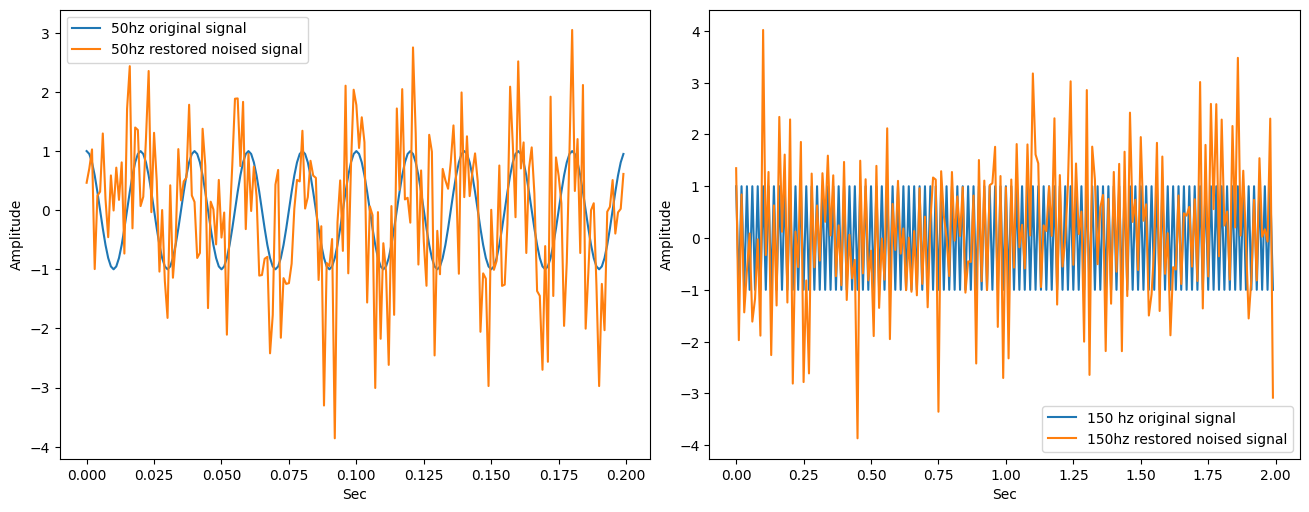

In [211]:
fig = plt.figure(figsize=(16, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.4)

plt.subplot(221)
plt.plot(t_series_50hz, cos_50hz_signal, label="50hz original signal")
plt.plot(t_series_50hz, restored_noised_50hz_signal, label="50hz restored noised signal")
plt.legend()
plt.xlabel("Sec")
plt.ylabel("Amplitude")

plt.subplot(222)
plt.plot(t_series_150hz, cos_150hz_signal, label="150 hz original signal")
plt.plot(t_series_150hz, restored_noised_150hz_signal, label="150hz restored noised signal")
plt.legend()
plt.xlabel("Sec")
plt.ylabel("Amplitude")
plt.plot()

# Task 2

In [212]:
def rec_impulse_func(A, T):
    def _rec_pulse(t):
        t = np.floor(t)
        if t % T == 0:
            return A
        else:
            return 0
    return _rec_pulse

In [213]:
rec_signal_f = rec_impulse_func(A = 2, T = 2)

rec_signal, t_series_rec = calc_signal(rec_signal_f, t_end=4, t_step=0.01)

In [214]:
noise_rec = np.random.normal(0, 1, rec_signal.shape)

noised_rec_signal = rec_signal + noise_rec

spectrum_rec_impulse_fft = np.fft.fft(rec_signal)[5:-5]
spectrum_rec_impulse_dft = DFT_slow(rec_signal)[5:-5]
noised_rec_impulse_fft   = np.fft.fft(noised_rec_signal)[5:-5]

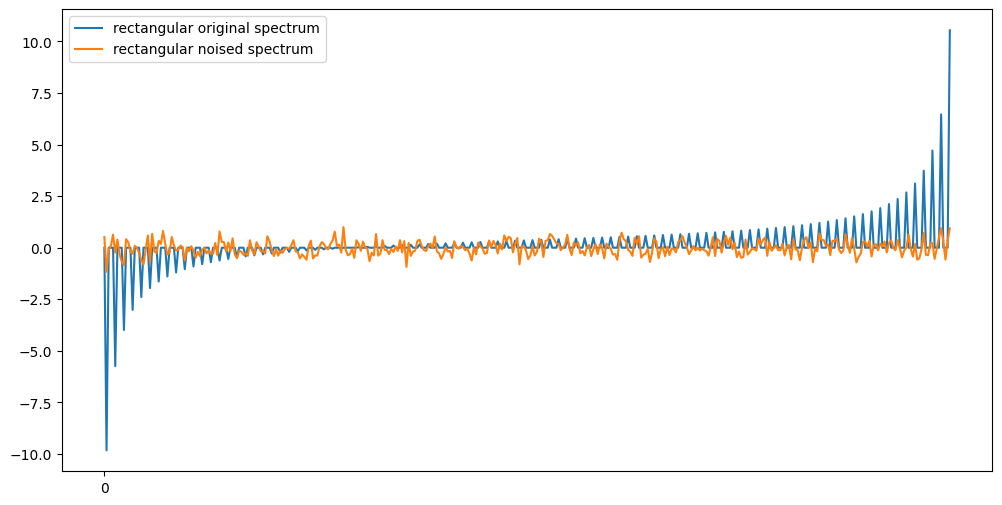

In [215]:
fig = plt.figure(figsize=(12, 6))

plt.plot(spectrum_rec_impulse_fft/np.max(spectrum_rec_impulse_fft), label="rectangular original spectrum")
plt.plot(noised_rec_impulse_fft/np.max(noised_rec_impulse_fft), label="rectangular noised spectrum")
plt.legend()
plt.xticks([0])
plt.show()

In [216]:
def DFT_fast(signal):
    N = signal.shape[0]

    W_N_kn = lambda _N, _k, _n: np.exp(-2j * np.pi * _k * _n / _N)

In [217]:
def FFT(signal):
    _signal = np.asarray(signal, dtype=float)
    N = _signal.shape[0]
    
    n = np.arange(N)
    k = n.reshape(-1, 1)

    M = np.exp(-2j * np.pi * n * k / N)
    spectrum = np.dot(M, _signal.reshape(N, -1))

    while spectrum.shape[0] < N:
        spectrum_even = spectrum[:, :spectrum.shape[1] // 2]
        spectrum_odd = spectrum[:, spectrum.shape[1] // 2:]
        factor = np.exp(-1j * np.pi * np.arange(spectrum.shape[0]) / spectrum.shape[0]).reshape(-1, 1)
        spectrum = np.vstack([spectrum_even + factor * spectrum_odd, spectrum_even - factor * spectrum_odd])

    return spectrum.reshape(-1)

In [218]:
np.allclose(FFT(cos_150hz_signal), np.fft.fft(cos_150hz_signal))

True

In [219]:
cos_50hz_signal, t_series_50hz = calc_signal(cos_50hz_f, t_end=0.3, t_step=0.01)

runs_count = 100

spectrum_fft_50hz_time = timeit.timeit(lambda: np.fft.fft(cos_150hz_signal), number=runs_count)
spectrum_fft_50hz = np.fft.fft(cos_150hz_signal)

spectrum_myfft_50hz_time = timeit.timeit(lambda: FFT(cos_150hz_signal), number=runs_count)
spectrum_myfft_50hz = FFT(cos_150hz_signal)

print(f"""fft ({runs_count} times):
      50hz: {spectrum_fft_50hz_time:.4f} sec""")
print(f"""my fft ({runs_count} times):
      50hz: {spectrum_myfft_50hz_time:.4f} sec""")
print(f"fft is {spectrum_fft_50hz_time/spectrum_myfft_50hz_time:.1f} times faster")

fft (100 times):
      50hz: 0.0014 sec
my fft (100 times):
      50hz: 0.2406 sec
fft is 0.0 times faster


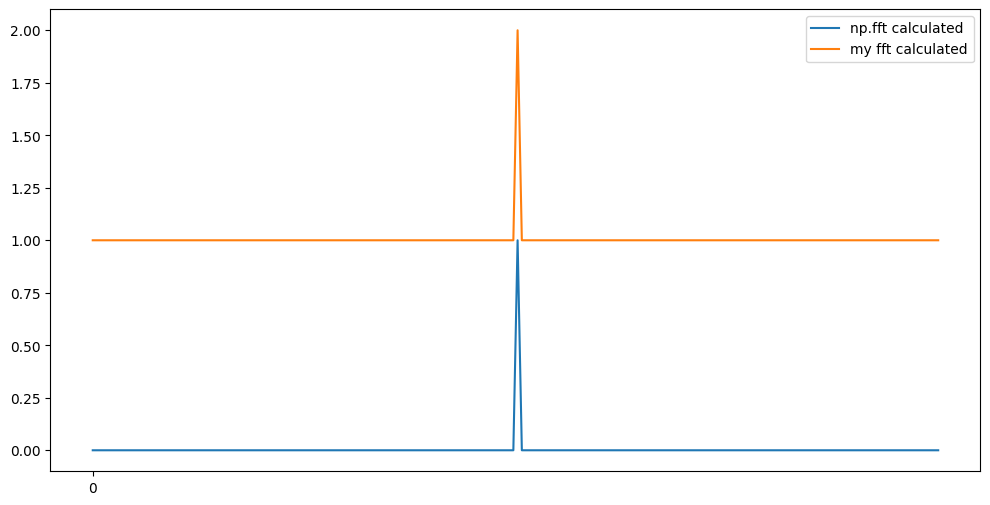

In [220]:
fig = plt.figure(figsize=(12, 6))

plt.plot(spectrum_fft_50hz/np.max(spectrum_fft_50hz), label="np.fft calculated")
plt.plot(spectrum_myfft_50hz/np.max(spectrum_myfft_50hz) + 1, label="my fft calculated")
plt.legend()
plt.xticks([0])
plt.show()